#  **1. Collect Data**

## Mô hình Gaussian Naive Bayes: Giải thích chi tiết



  ### Gaussian Naive Bayes là gì?

  Gaussian Naive Bayes (GNB) là một thuật toán phân loại đơn giản nhưng hiệu quả trong học máy, thuộc họ thuật toán Naive Bayes. Nó được sử dụng để dự đoán lớp (class) của một mẫu dữ liệu mới dựa trên các đặc trưng (features) của mẫu đó.

  **Tại sao gọi là "Gaussian Naive Bayes"?**

  * **Gaussian:** Vì thuật toán này giả định rằng các đặc trưng của dữ liệu tuân theo phân phối chuẩn (Gaussian distribution).
  * **Naive:** Vì nó giả định rằng các đặc trưng là độc lập với nhau, nghĩa là giá trị của một đặc trưng không ảnh hưởng đến giá trị của các đặc trưng khác. Mặc dù giả định này thường không hoàn toàn đúng trong thực tế, nhưng GNB vẫn cho kết quả khá tốt trong nhiều trường hợp.

  ### Nguyên lý hoạt động

  1. **Tính toán xác suất:**
    * **Xác suất trước (prior probability):** Tính xác suất của từng lớp xuất hiện trong dữ liệu huấn luyện.
    * **Xác suất có điều kiện (conditional probability):** Tính xác suất của một đặc trưng có giá trị nhất định, cho trước một lớp. Do giả định tính độc lập, xác suất chung của một mẫu dữ liệu thuộc một lớp sẽ bằng tích của các xác suất có điều kiện của từng đặc trưng.

  2. **Áp dụng định lý Bayes:**
    * Sử dụng định lý Bayes để tính xác suất hậu nghiệm (posterior probability), tức là xác suất một mẫu dữ liệu thuộc một lớp nhất định, dựa trên các giá trị của các đặc trưng. Lớp có xác suất hậu nghiệm cao nhất sẽ được chọn làm nhãn dự đoán cho mẫu đó.

  ### Ưu điểm của Gaussian Naive Bayes

  * **Đơn giản và dễ hiểu:** Nguyên lý hoạt động dễ dàng nắm bắt.
  * **Hiệu quả tính toán:** Thời gian huấn luyện và dự đoán nhanh.
  * **Hiệu quả với dữ liệu lớn:** Có thể xử lý được lượng dữ liệu lớn.
  * **Ít tham số cần điều chỉnh:** Giảm thiểu rủi ro overfitting.

  ### Nhược điểm của Gaussian Naive Bayes

  * **Giả định tính độc lập:** Giả định này thường không đúng trong thực tế, có thể ảnh hưởng đến độ chính xác của mô hình.
  * **Phân phối Gaussian:** Nếu dữ liệu không tuân theo phân phối Gaussian, kết quả dự đoán có thể không chính xác.
  * **Độ nhạy cảm với dữ liệu thiếu:** Cần xử lý kỹ dữ liệu thiếu trước khi đưa vào mô hình.

  ### Ứng dụng của Gaussian Naive Bayes

  * **Phân loại văn bản:** Phân loại email (spam/không spam), phân loại tin tức theo chủ đề.
  * **Phân loại hình ảnh:** Phân loại ảnh theo nội dung (chó, mèo, người).
  * **Y học:** Dự đoán bệnh dựa trên các triệu chứng.

  ### Khi nào nên sử dụng Gaussian Naive Bayes?

  * **Dữ liệu lớn:** GNB hoạt động tốt với lượng dữ liệu lớn.
  * **Tính toán nhanh:** Khi cần kết quả dự đoán nhanh.
  * **Vấn đề phân loại đơn giản:** GNB phù hợp với các vấn đề phân loại không quá phức tạp.



## **Import lib**

In [255]:
# Import lib
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning, message='`should_run_async` will not call `transform_cell` automatically')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [256]:
#read data từ xlsx file
# Đường dẫn đến file xlsx
file_path = '/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/THONGKESVISHOCTUCHON.xlsx'

# **2. Data preprocessing**

## 2.1 split sheet to csv format

1. Kiểm tra số dòng dữ liệu null.
2. Dùng hàm dropna()để loại bỏ các hàng hoặc cột có giá trị null, thay đổi sẽ được thực hiện trực tiếp lên DataFrame ban đầu  với đối số inplace=True.
3. Tách các sheet trong định sang xlxs thành các file định dạng csv
4. Lưu file


In [257]:
sheet_name = ["DSTK","DSmonTC","DScoDiem","Dulieu0205"]

def split_sheet_to_csv(sheet_name):
  for sheet in sheet_name:
    df = pd.read_excel(file_path, sheet_name = sheet)
    count_null_rows = df.isnull().any(axis=1).sum()
    print(f"Số dòng có giá trị null trong sheet {sheet} : {count_null_rows}")
    df.dropna(inplace=True)
    print(df)
    df.to_csv(f'/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/{sheet}.csv', index=False ,encoding='utf-8')
    print(f"Sheet '{sheet}' đã được lưu thành tệp CSV.")
    print("\n========== Kết thúc", sheet,"===========================\n\n")

split_sheet_to_csv(sheet_name)

Số dòng có giá trị null trong sheet DSTK : 340
      IDSinhVien  MaMonHoc           TenDot
0      1677250.0    3197.0  HK1 (2019-2020)
1      1677250.0    3203.0  HK2 (2019-2020)
2      1677250.0    3395.0  HK1 (2020-2021)
3      1677250.0    1076.0  HK1 (2020-2021)
4      1677250.0     901.0  HK1 (2020-2021)
...          ...       ...              ...
5001   1736737.0    3345.0  HK2 (2022-2023)
5002   1736737.0    3206.0  HK1 (2023-2024)
5003   1736737.0    3591.0  HK1 (2023-2024)
5007   1737233.0    3320.0  HK2 (2022-2023)
5008   1737233.0    3591.0  HK1 (2023-2024)

[4669 rows x 3 columns]
Sheet 'DSTK' đã được lưu thành tệp CSV.

========== Kết thúc DSTK ===========================


Số dòng có giá trị null trong sheet DSmonTC : 0
    MaMonHoc                                     TenMonHoc  HK  KCNTT
0       3240             Hàm phức và phép biến đổi Laplace   2      0
1       3395                                     Logic học   2      0
2       3320                              Phươ

## 2.2 Thêm cột"HK" cho Dulieu0205

In [258]:
DSTK="/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/DSTK.csv"
DSmonTC="/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/DSmonTC.csv"
DScoDiem="/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/DScoDiem.csv"
Dulieu0205="/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/Dulieu0205.csv"

In [280]:
# Load the data
df_dulieu0205 = pd.read_csv(Dulieu0205)
df_dsmonTC = pd.read_csv(DSmonTC)

# Merge the DataFrames based on 'MaMonHoc'
df_merged = df_dulieu0205.merge(df_dsmonTC[['MaMonHoc', 'HK']], on='MaMonHoc', how='left')

# Update the 'Dulieu0205' DataFrame with the new 'HK' column
df_dulieu0205['HK'] = df_merged['HK']
# Lọc các cột cần thiết
df_filtered = df_dulieu0205[["IDSinhVien", "HK", "MaMonHoc", "DiemTongKet"]]
#print(df_filtered)
df_filtered.describe()
# Calculate the average 'DiemTongKet' for each 'IDSinhVien' and 'HK'
df_avg = df_filtered.groupby(['IDSinhVien', 'HK'])['DiemTongKet'].mean().reset_index()
df_avg.rename(columns={'DiemTongKet': 'DiemTB'}, inplace=True)

# Merge the average score back to the original DataFrame
df_merged = df_filtered.merge(df_avg, on=['IDSinhVien', 'HK'], how='left')

# Apply the grading scale to the average score
def apply_grading_scale(average):
    if average >= 8.5 and average <= 10:
      average = 4.0
    elif average >= 7 and average < 8.5:
      average = 3.0
    elif average >= 5.5 and average < 7:
      average = 2.0
    elif average >= 4 and average < 5.5:
      average = 1.0
    elif average >= 0 and average < 4:
      average = 0.0
    else:
      average = average
    return average

df_merged['DiemTB'] = df_merged['DiemTB'].apply(apply_grading_scale)

# Display the updated DataFrame
#df_merged.head(15)
df_merged.to_csv("/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/db_chuan_hoa_average.csv", index=False, encoding="utf-8")


In [233]:
df_merged.head(10)

,IDSinhVien,HK,MaMonHoc,DiemTongKet,DiemTB
0,1677250,3,3197,8.0,3.0
1,1677250,4,3203,7.6,4.0
2,1677250,2,3395,8.9,4.0
3,1677250,5,1076,7.9,3.0
4,1677250,4,901,9.5,4.0
5,1677250,6,3893,9.3,4.0
6,1677250,6,4032,8.4,4.0
7,1677250,7,1295,7.6,3.0
8,1677250,7,1366,8.3,3.0
9,1677250,5,3453,7.7,3.0


In [283]:
#IDSinhVien = 1677250 và HK = 6
#IDSinhVien = 1678614 và HK = 7
#IDSinhVien = 1679394 và HK = 5
#IDSinhVien = 1706130 và HK = 4
#IDSinhVien = 1710911 và HK = 5

df_merged = df_merged[~((df_merged['IDSinhVien'] == 1677250) & (df_merged['HK'] == 6))]
df_merged = df_merged[~((df_merged['IDSinhVien'] == 1678614) & (df_merged['HK'] == 7))]
df_merged = df_merged[~((df_merged['IDSinhVien'] == 1679394) & (df_merged['HK'] == 5))]
df_merged = df_merged[~((df_merged['IDSinhVien'] == 1706130) & (df_merged['HK'] == 4))]
df_merged = df_merged[~((df_merged['IDSinhVien'] == 1710911) & (df_merged['HK'] == 5))]
df_merged.to_csv("/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/db_chuan_hoa_average-HK.csv", index=False, encoding="utf-8")


# **3. Data mining**

In [265]:
file_path = "/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/db_chuan_hoa_average-HK.csv"
df = pd.read_csv(file_path)
df.head(10)

,IDSinhVien,HK,MaMonHoc,DiemTongKet,DiemTB
0,1677250,3,3197,8.0,3.0
1,1677250,4,3203,7.6,4.0
2,1677250,2,3395,8.9,4.0
3,1677250,5,1076,7.9,3.0
4,1677250,4,901,9.5,4.0
5,1677250,7,1295,7.6,3.0
6,1677250,7,1366,8.3,3.0
7,1677250,5,3453,7.7,3.0
8,1678332,2,3345,8.3,3.0
9,1678332,3,3196,6.4,2.0


HK          2    3    4    5    6    7
MaMonHoc                              
901         0    0   30    0    0    0
1076        0    0    0  371    0    0
1276        0    0    0  248    0    0
1295        0    0    0    0    0  236
1366        0    0    0    0    0   12
2031        0    0  427    0    0    0
2296        0    0    0    0    0   43
2329        0    0    0   35    0    0
2330        0    0    0    0    0  117
3193       17    0    0    0    0    0
3194        0    0    1    0    0    0
3195        0    0   12    0    0    0
3196        0  105    0    0    0    0
3197        0  119    0    0    0    0
3203        0    0   25    0    0    0
3205        0   32    0    0    0    0
3206        0  201    0    0    0    0
3217        0   53    0    0    0    0
3240        1    0    0    0    0    0
3245        0    0  255    0    0    0
3285        0    7    0    0    0    0
3320      120    0    0    0    0    0
3325        0    0  109    0    0    0
3345      321    0    0  

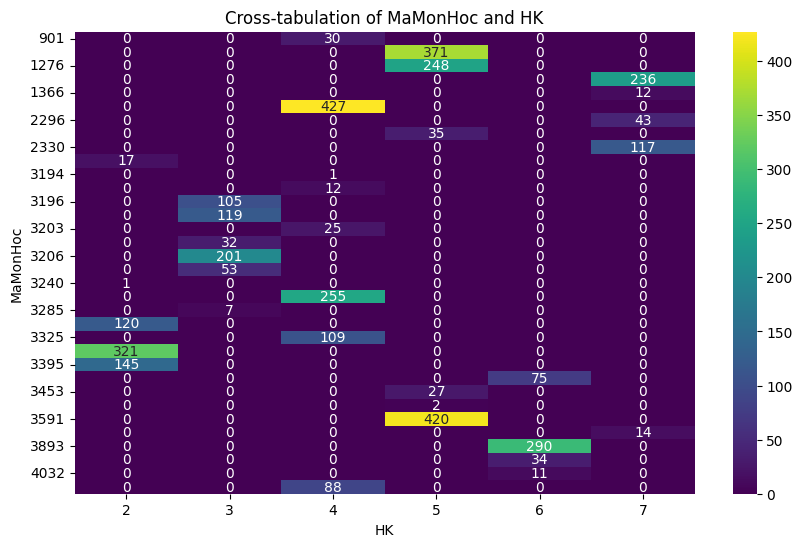

In [266]:
# prompt: trực quang MaMonHoc với HK

import pandas as pd
import matplotlib.pyplot as plt
# Create a cross-tabulation of 'MaMonHoc' and 'HK'
cross_tab = pd.crosstab(df['MaMonHoc'], df['HK'])

# Display the cross-tabulation
print(cross_tab)

# Visualize the cross-tabulation with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cross_tab, annot=True, fmt="d", cmap="viridis")
plt.title("Cross-tabulation of MaMonHoc and HK")
plt.xlabel("HK")
plt.ylabel("MaMonHoc")
plt.show()


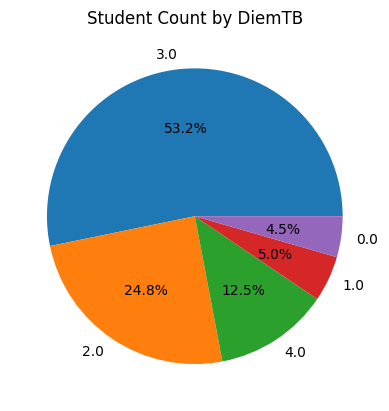

In [267]:
# @title Student Count by DiemTB

import matplotlib.pyplot as plt

df['DiemTB'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.ylabel('')
_ = plt.title('Student Count by DiemTB')

In [268]:
df.describe()

,IDSinhVien,HK,MaMonHoc,DiemTongKet,DiemTB
count,4.003000e+03,4003.000000,4003.000000,4003.000000,4003.000000
mean,1.703815e+06,4.365726,2882.374469,7.109943,2.643767
std,1.326983e+04,1.494499,1510.861520,1.836356,0.921183
min,1.677250e+06,2.000000,901.000000,0.000000,0.000000
25%,1.694598e+06,3.000000,2031.000000,6.600000,2.000000
50%,1.702895e+06,4.000000,3206.000000,7.400000,3.000000
75%,1.711954e+06,5.000000,3395.000000,8.200000,3.000000
max,1.737233e+06,7.000000,10665.000000,10.000000,4.000000


In [269]:
display(df.nunique())

,0
IDSinhVien,591
HK,6
MaMonHoc,34
DiemTongKet,75
DiemTB,5


<Axes: >

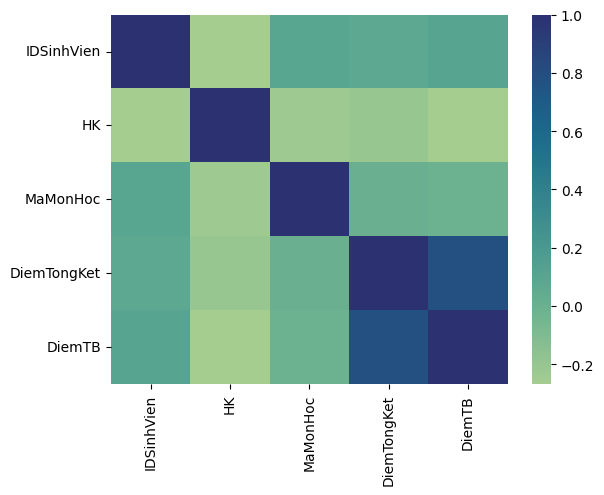

In [311]:
sns.heatmap(df.corr(),cmap="crest")

# **4 Data modeling and prediction**

In [277]:
def filter_IDSinhVien(temp, IDSinhVien):
  filtered_df = temp[temp['IDSinhVien'] == IDSinhVien]
  return filtered_df

In [296]:
# Kiểm tra thông tin SV dùng để train
file_path_check_train = "/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/db_chuan_hoa_average-HK.csv"
df_check_train = pd.read_csv(file_path_check_train )
filter_IDSinhVien(df_check_train, 1678614)

,IDSinhVien,HK,MaMonHoc,DiemTongKet,DiemTB
27,1678614,4,3195,7.7,2.0
28,1678614,3,3196,7.4,2.0
29,1678614,3,3217,6.3,2.0
30,1678614,2,3395,6.3,2.0
31,1678614,5,1076,6.5,3.0
32,1678614,4,10665,7.5,2.0
33,1678614,6,3893,8.4,3.0
34,1678614,6,3443,6.4,3.0
35,1678614,5,3453,8.3,3.0
36,1678614,4,901,4.3,2.0


In [297]:
# Kiểm tra thông tin SV dùng để test
file_path_check_fillter = "/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/db_chuan_hoa_average.csv"
df_check_fillter = pd.read_csv(file_path_check_fillter )
filter_IDSinhVien(df_check_fillter, 1678614)

,IDSinhVien,HK,MaMonHoc,DiemTongKet,DiemTB
29,1678614,4,3195,7.7,2.0
30,1678614,3,3196,7.4,2.0
31,1678614,3,3217,6.3,2.0
32,1678614,2,3395,6.3,2.0
33,1678614,5,1076,6.5,3.0
34,1678614,4,10665,7.5,2.0
35,1678614,6,3893,8.4,3.0
36,1678614,7,2296,6.8,2.0
37,1678614,6,3443,6.4,3.0
38,1678614,5,3453,8.3,3.0


In [294]:

# Chuẩn bị dữ liệu cho mô hình
X = df[["IDSinhVien", "HK", "DiemTB"]]
y = df["MaMonHoc"]

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chọn mô hình GaussianNB
model = GaussianNB()

# Huấn luyện mô hình
model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Đánh giá độ chính xác
accuracy = accuracy_score(y_test, y_pred)
print("Độ chính xác của mô hình:", round(accuracy*100,2))

# Hàm đề xuất môn học
def suggest_subject(id_sinh_vien, hk, average):
  # Tạo dữ liệu đầu vào cho mô hình
  input_data = pd.DataFrame([[id_sinh_vien, hk, average]], columns=["IDSinhVien", "HK", "DiemTB"])
  # Dự đoán môn học
  predicted_subject = model.predict(input_data)[0]
  return predicted_subject




Độ chính xác của mô hình: 50.19


In [309]:
#save model

import pickle

# Save the model to a file
filename = '/content/drive/MyDrive/Colab Notebooks/03_deeplearning/Assignment_01/naive_bayes_model.sav'
pickle.dump(model, open(filename, 'wb'))


In [310]:
# Ví dụ sử dụng hàm đề xuất môn học cho học kỳ tiếp theo
id_sinh_vien = 1678614.0
hk = 7
average = 2
suggested_subject = suggest_subject(id_sinh_vien, hk, average)
print("Môn học được đề xuất:", suggested_subject)

Môn học được đề xuất: 1295


# **5. Data visualization**

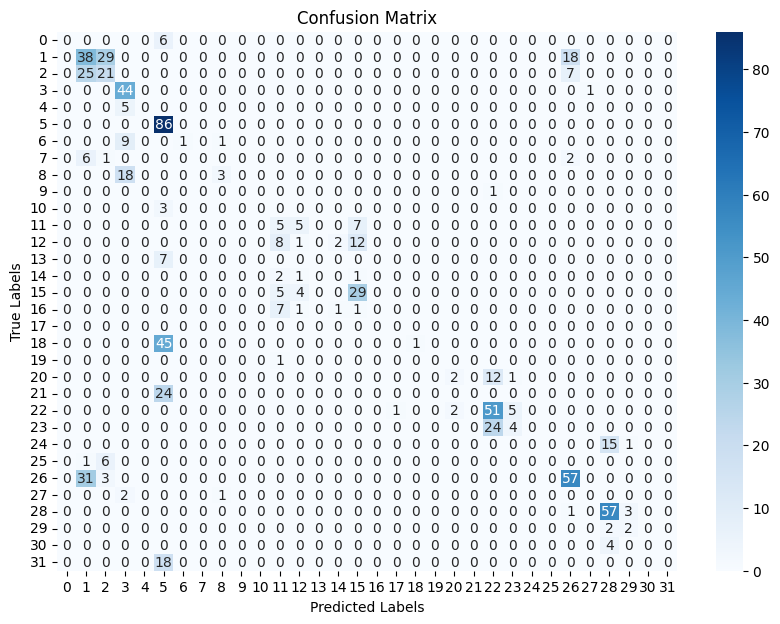

In [302]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred)

# Hiển thị ma trận nhầm lẫn bằng seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [303]:
from sklearn.metrics import classification_report

# Tạo classification report
report = classification_report(y_test, y_pred)
print(report)


              precision    recall  f1-score   support

         901       0.00      0.00      0.00         6
        1076       0.38      0.45      0.41        85
        1276       0.35      0.40      0.37        53
        1295       0.56      0.98      0.72        45
        1366       0.00      0.00      0.00         5
        2031       0.46      1.00      0.63        86
        2296       1.00      0.09      0.17        11
        2329       0.00      0.00      0.00         9
        2330       0.60      0.14      0.23        21
        3193       0.00      0.00      0.00         1
        3195       0.00      0.00      0.00         3
        3196       0.18      0.29      0.22        17
        3197       0.08      0.04      0.06        23
        3203       0.00      0.00      0.00         7
        3205       0.00      0.00      0.00         4
        3206       0.58      0.76      0.66        38
        3217       0.00      0.00      0.00        10
        3240       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.